In [4]:
import pydicom 
import os      
import csv     
import numpy as np
import matplotlib.pyplot as plt
import math 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider 

In [5]:
data_dir_1 = './Tarea_1/datos/data_1'
output_csv_data_1 = 'patient_info_data1.csv'
output_data_1_anon = './Tarea_1/datos/data_1_anon' 

data_dir_2 = './Tarea_1/datos/data_2'

p5_filepath = './Tarea_1/datos/p5.dcm'

## 3.1

In [6]:
patient_data = []

for filename in os.listdir(data_dir_1):
  
    filepath = os.path.join(data_dir_1, filename)

    if os.path.isfile(filepath):
        ds = pydicom.dcmread(filepath, force=True) 

        patient_name = ds.get('PatientName', 'N/A') # Nombre
        birth_date = ds.get('PatientBirthDate', 'N/A') # Cumpleaños

        # Añadir los datos a una lista
        patient_data.append([patient_name, birth_date])
        print(f"Nombre: {patient_name}, Cumpleaños: {birth_date}")

total_pacientes = len(patient_data)
print(f"Total de pacientes procesados: {total_pacientes}")

if patient_data: # Solo escribir si se encontraron datos
    with open(output_csv_data_1, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # Escribir la cabecera
        writer.writerow(['PatientName', 'PatientBirthDate'])
        # Escribir los datos de los pacientes
        writer.writerows(patient_data)
        print(f"Datos escritos en {output_csv_data_1}")

Nombre: Débora Salas, Cumpleaños: 19770508
Nombre: Luis Chabert, Cumpleaños: 19830208
Nombre: Alejandro Chabert, Cumpleaños: 19791001
Nombre: Cesar Buendía, Cumpleaños: 19830729
Nombre: Germán Roncagliolo, Cumpleaños: 19770513
Nombre: Pablo Roncagliolo, Cumpleaños: 19830202
Nombre: Germán Salas, Cumpleaños: 19850204
Nombre: Pablo Buendía, Cumpleaños: 19850915
Nombre: Wael Veloz, Cumpleaños: 19770720
Nombre: Germán Buendía, Cumpleaños: 19830404
Nombre: Wael Veloz, Cumpleaños: 19850114
Nombre: Wael Weinstein, Cumpleaños: 19790504
Nombre: Wael Salas, Cumpleaños: 19751019
Nombre: Steren Veloz, Cumpleaños: 19851117
Nombre: Scarlett Salas, Cumpleaños: 19790118
Nombre: Germán Weinstein, Cumpleaños: 19771120
Nombre: Luis Veloz, Cumpleaños: 19790923
Nombre: Débora Chabert, Cumpleaños: 19810913
Nombre: Germán Lever, Cumpleaños: 19850103
Nombre: Germán Buendía, Cumpleaños: 19850401
Total de pacientes procesados: 20
Datos escritos en patient_info_data1.csv


## 3.2

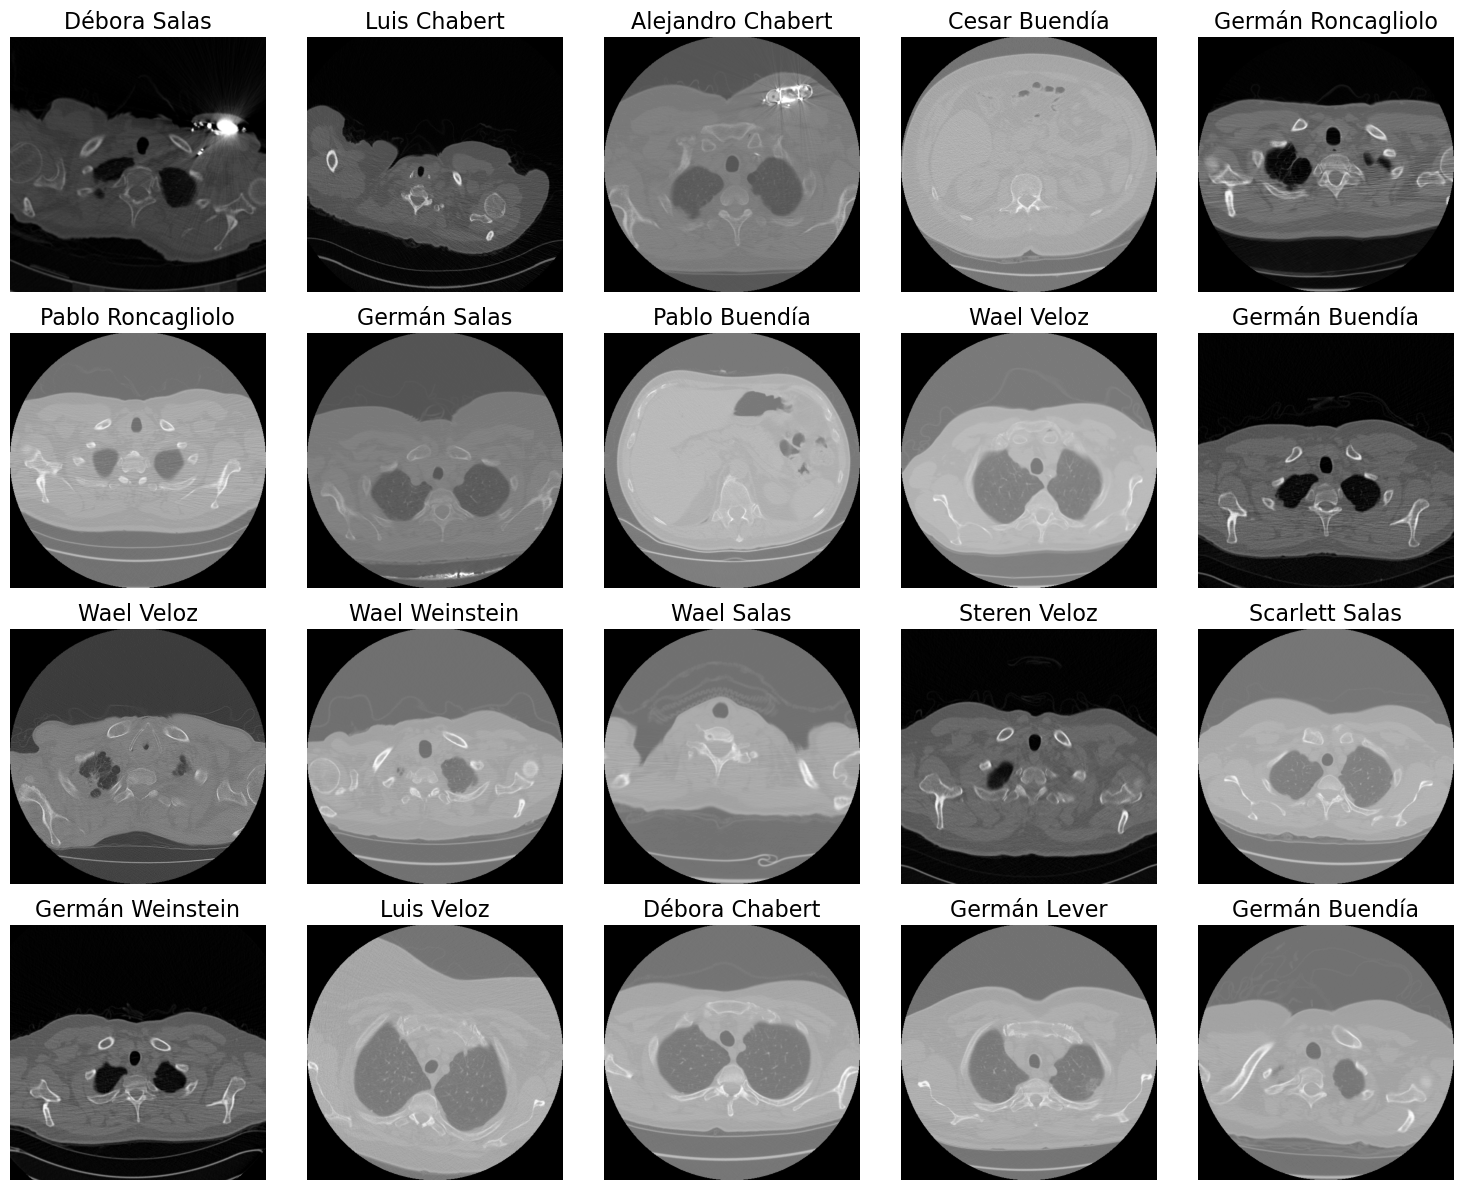

In [7]:

dicom_files = []

for filename in os.listdir(data_dir_1):

    filepath = os.path.join(data_dir_1, filename)

    if os.path.isfile(filepath):

        dicom_files.append(filepath) 

# leer 
valid_datasets = []
patient_names = []

for filepath in dicom_files:
        
    ds = pydicom.dcmread(filepath) # lee pixeles


    if 'PixelData' in ds:

        patient_name_tag = ds.get('PatientName', 'Nombre Desconocido')
        if isinstance(patient_name_tag, pydicom.valuerep.PersonName):
            patient_name = str(patient_name_tag)

        valid_datasets.append(ds)
        patient_names.append(patient_name)


if valid_datasets:

    # dimensiones
    num_images = len(valid_datasets)
    
    cols = math.ceil(math.sqrt(num_images))
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3)) # Ajusta el tamaño por subplot

    axes = axes.ravel()

    # Iterar sobre los datasets DICOM válidos y mostrarlos
    for i, ds in enumerate(valid_datasets):

        axes[i].imshow(ds.pixel_array, cmap=plt.cm.gray)
        # nombre del paciente 
        axes[i].set_title(patient_names[i], fontsize=16) 
        axes[i].axis('off')

    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

## 3.2

In [8]:
tags_to_anonymize = [
    'PatientName',        # (0010,0010)
    'PatientID',          # (0010,0020)
    'PatientBirthDate',   # (0010,0030)
    'PatientSex',         # (0010,0040) 
    'PatientAddress',     # (0010,1040) - Si existe
    'PatientTelephoneNumbers', # (0010,2154) - Si existe
    'ReferringPhysicianName', # (0008,0090) - Si existe
    'InstitutionName',    # (0008,0080) - Si existe
    'OperatorsName',      # (0008,1070) - Si existe
    # Sacadas de chatGPT las dejo para saber cuales existen.
    # 'OtherPatientIDs', (0010,1000)
    # (0010, 1001) OtherPatientNames
    # (0010, 1010) PatientAge
    # (0010, 1060) PatientMotherBirthName
    # (0010, 2160) EthnicGroup
    # (0010, 4000) PatientComments
    # (0008, 0050) AccessionNumber
    # (0008, 1030) StudyDescription
    # (0008, 103E) SeriesDescription
    # (0008, 1040) InstitutionalDepartmentName
    # (0008, 1050) PerformingPhysicianName
    # (0008, 1060) NameOfPhysiciansReadingStudy
    # (0020, 000D) StudyInstanceUID - ¡Cuidado! Cambiar UIDs puede romper referencias
    # (0020, 000E) SeriesInstanceUID - ¡Cuidado!
    # (0008, 0018) SOPInstanceUID - ¡Cuidado!
]

# Función para anonimizar un dataset DICOM
def anonymize_dicom_dataset(ds):
    for tag_key in tags_to_anonymize:
        if tag_key in ds:

            data_element = ds.data_element(tag_key)
            if data_element.VR in ['LO', 'SH', 'PN', 'CS', 'AS', 'AE', 'LT', 'ST', 'UT', 'DA', 'TM', 'DT']:
                    ds[tag_key].value = '' # Asignar vacío
            else:
                    del ds[tag_key]

    # tiqueta indicando que el archivo fue modificado/anonimizado
    ds.add_new((0x0012, 0x0062), 'CS', 'YES')  # PatientIdentityRemoved
    ds.add_new((0x0012, 0x0063), 'LO', 'Anonimizado por script Tarea1') # DeidentificationMethod
    return ds



if os.path.isdir(data_dir_1):

    os.makedirs(output_data_1_anon, exist_ok=True) # exist_ok=True evita error si ya existe

    # Procesar cada archivo DICOM en la carpeta
    file_count = 0
    success_count = 0
    for filename in os.listdir(data_dir_1):
        input_filepath = os.path.join(data_dir_1, filename)
        output_filepath = os.path.join(output_data_1_anon, filename) # Mismo nombre, diferente carpeta

        if os.path.isfile(input_filepath):
            file_count += 1
            # Leer el archivo DICOM original (completo)
            ds = pydicom.dcmread(input_filepath)

            # Anonimizar el dataset
            ds_anon = anonymize_dicom_dataset(ds)

            # Guardar el dataset anonimizado en la carpeta de salida
            # ds_anon.save_as(output_filepath) # Alternativa
            pydicom.dcmwrite(output_filepath, ds_anon, write_like_original=True)
            print(f"Archivo anonimizado guardado: {output_filepath}")
            success_count += 1
    print(f"Total de archivos procesados: {file_count}")
    print(f"Total de archivos anonimizado: {success_count}")

Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\019787df3ae203ec160fb86dbee9275b.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\121969a3ea1dcd63ea14b7c8754098d3.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\16e2678d2ea8d8638f69a6f7b54eb030.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\22b3866a120110dde0ed9bfd73088e93.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\24cdd17911455e15811b3a330d625ce9.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\3d5a32fc7bc51b8c88ad46cce0354520.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\50cda0fb366c8e4b30766b3a435c3a40.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\53494c16c19ddf12a01ee4affd2a3181.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\5b5a722e6da741943f0f761ec4b4d7ec.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data_1_anon\6b9959c342ad8cc56e42e2e3905424d4.dcm
Archivo anonimizado guardado: ./Tarea_1/datos/data

## 3.4

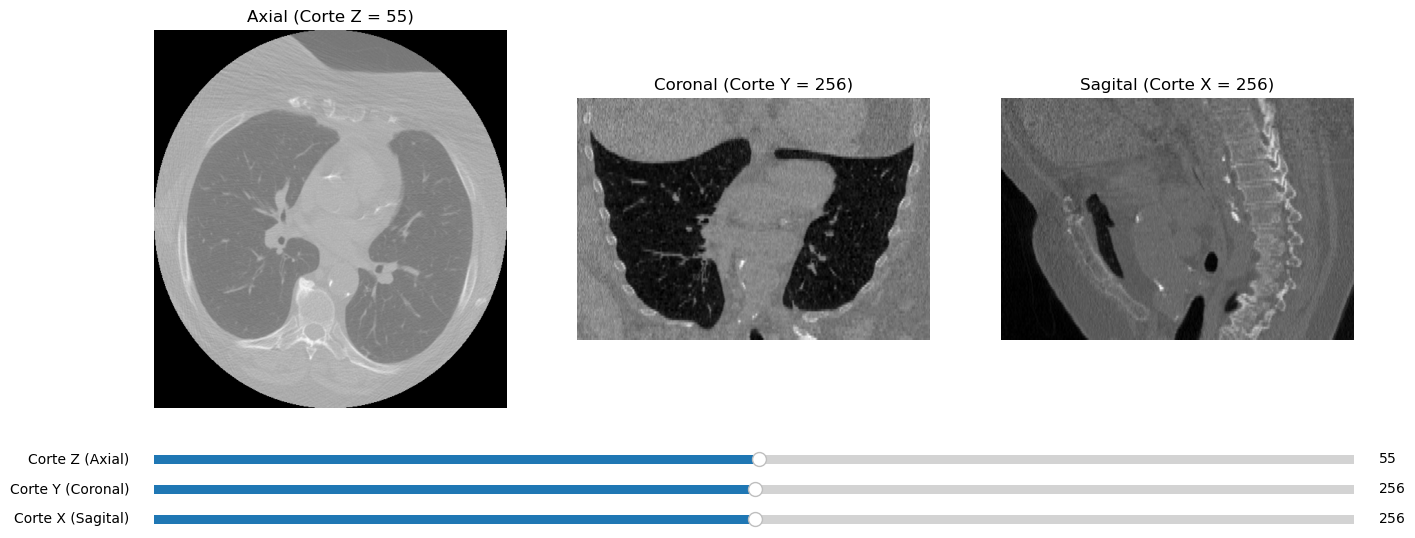

In [9]:
slices = []

# Verificar si el directorio data_2 existe
if os.path.isdir(data_dir_2):
    for filename in os.listdir(data_dir_2):
        filepath = os.path.join(data_dir_2, filename)
        if os.path.isfile(filepath):
            try:
                ds = pydicom.dcmread(filepath)
                if 'PixelData' in ds and ('SliceLocation' in ds or 'ImagePositionPatient' in ds):
                    slices.append(ds)
            except Exception as e:
                print(f"Error al leer el archivo {filename}: {e}")

# se leyeron cortes
if slices:
    if hasattr(slices[0], 'SliceLocation'):
        slices.sort(key=lambda x: float(x.SliceLocation))
    elif hasattr(slices[0], 'ImagePositionPatient'):
        slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))

    shape = slices[0].pixel_array.shape
    volume_ok = True
    for ds in slices[1:]:
        if ds.pixel_array.shape != shape:
            volume_ok = False
            print("¡Advertencia! Las dimensiones de los cortes no son consistentes.")
            break

    if volume_ok:
        volume_3d = np.stack([s.pixel_array for s in slices], axis=0)

        num_slices, rows, cols = volume_3d.shape

        fig, axes = plt.subplots(1, 3, figsize=(15, 6)) 

        plt.subplots_adjust(left=0.1, bottom=0.25)

        pixel_spacing = slices[0].get('PixelSpacing', [1, 1])
        slice_thickness = slices[0].get('SliceThickness', pixel_spacing[0])
        aspect_coronal = slice_thickness / pixel_spacing[1] # Z / X
        aspect_sagittal = slice_thickness / pixel_spacing[0] # Z / Y

        initial_z = num_slices // 2
        initial_y = rows // 2
        initial_x = cols // 2

        im_axial = axes[0].imshow(volume_3d[initial_z, :, :], cmap=plt.cm.gray, aspect='auto')
        im_coronal = axes[1].imshow(volume_3d[:, initial_y, :], cmap=plt.cm.gray, aspect=aspect_coronal)
        im_sagittal = axes[2].imshow(volume_3d[:, :, initial_x], cmap=plt.cm.gray, aspect=aspect_sagittal)

        # títulos iniciales
        axes[0].set_title(f'Axial (Corte Z = {initial_z})')
        axes[1].set_title(f'Coronal (Corte Y = {initial_y})')
        axes[2].set_title(f'Sagital (Corte X = {initial_x})')

        # Ocultar ejes numéricos
        for ax in axes:
            ax.axis('off')

        ax_slider_z = plt.axes([0.1, 0.15, 0.8, 0.03]) # eje Z (Axial)
        ax_slider_y = plt.axes([0.1, 0.1, 0.8, 0.03])   # eje Y (Coronal)
        ax_slider_x = plt.axes([0.1, 0.05, 0.8, 0.03]) # eje X (Sagital)

        # Slider
        slider_z = Slider(ax=ax_slider_z, label='Corte Z (Axial)',
                            valmin=0, valmax=num_slices - 1, valinit=initial_z, valstep=1)
        slider_y = Slider(ax=ax_slider_y, label='Corte Y (Coronal)',
                            valmin=0, valmax=rows - 1, valinit=initial_y, valstep=1)
        slider_x = Slider(ax=ax_slider_x, label='Corte X (Sagital)',
                            valmin=0, valmax=cols - 1, valinit=initial_x, valstep=1)

        def update(val):
            
            current_z = int(slider_z.val)
            current_y = int(slider_y.val)
            current_x = int(slider_x.val)

            
            im_axial.set_data(volume_3d[current_z, :, :])
            im_coronal.set_data(volume_3d[:, current_y, :])
            im_sagittal.set_data(volume_3d[:, :, current_x])

        
            axes[0].set_title(f'Axial (Corte Z = {current_z})')
            axes[1].set_title(f'Coronal (Corte Y = {current_y})')
            axes[2].set_title(f'Sagital (Corte X = {current_x})')

            # Volver a dibujar la figura para mostrar los cambios
            fig.canvas.draw_idle()

        # --- Conectar los Sliders a la Función de Actualización ---
        slider_z.on_changed(update)
        slider_y.on_changed(update)
        slider_x.on_changed(update)

        # Mostrar la figura interactiva
        plt.show()
    else:
        print("No se pudo crear un volumen 3D consistente.")

## 3.5

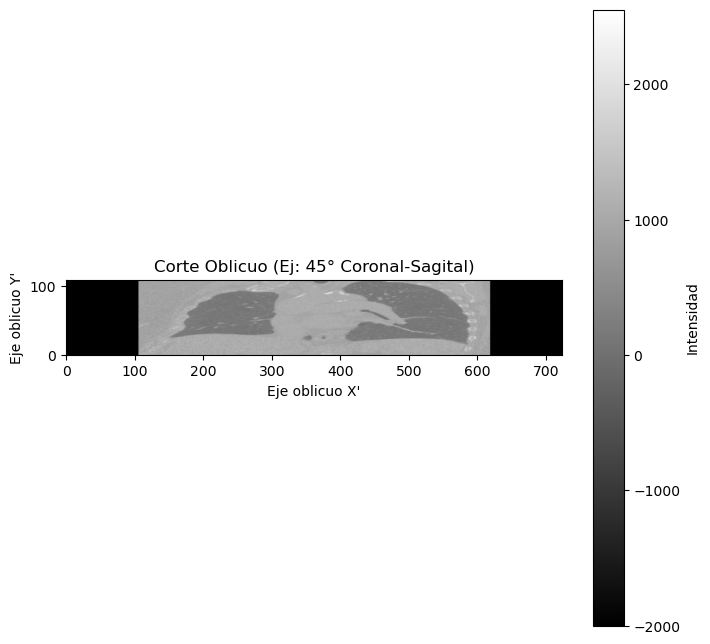

In [10]:
from scipy.ndimage import map_coordinates # Para la interpolación/mapeo


slices_2 = []

if os.path.isdir(data_dir_2):
    for filename in os.listdir(data_dir_2):

        filepath = os.path.join(data_dir_2, filename)

        if os.path.isfile(filepath):
            ds = pydicom.dcmread(filepath)

            if 'PixelData' in ds and ('SliceLocation' in ds or 'ImagePositionPatient' in ds):
                slices_2.append(ds)


if slices_2:

    if hasattr(slices[0], 'SliceLocation'):
        slices.sort(key=lambda x: float(x.SliceLocation))

    elif hasattr(slices[0], 'ImagePositionPatient'):
        slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))


    shape = slices[0].pixel_array.shape
    volume_ok = True
    for ds in slices[1:]:
        if ds.pixel_array.shape != shape:
            volume_ok = False
            break

    if volume_ok:
        volume_3d = np.stack([s.pixel_array for s in slices], axis=0)
        num_slices, rows, cols = volume_3d.shape

        # plano a 45 grados entre Coronal y Sagital, pasando por el centro.
        center_z = num_slices / 2.0
        center_y = rows / 2.0
        center_x = cols / 2.0
        center_point = np.array([center_z, center_y, center_x])

        #    Vector 1: a lo largo del eje Z (dirección original de los cortes)
        vec1 = np.array([1.0, 0.0, 0.0])
        #    Vector 2: a 45 grados entre Y y X en el plano XY
        angle = np.deg2rad(45) # Ángulo de 45 grados
        vec2 = np.array([0.0, np.cos(angle), np.sin(angle)])

        #    Asegurarse de que sean ortogonales (aunque en este caso lo son por construcción)
        #    vec1 = vec1 / np.linalg.norm(vec1) # Normalizar
        #    vec2 = vec2 / np.linalg.norm(vec2) # Normalizar

        # 2. Crear una rejilla (grid) de puntos en el plano oblicuo 2D
        #    Definimos el tamaño de la imagen oblicua (ej. similar al tamaño sagital/coronal)
        slice_height = num_slices # Usamos Z como altura
        slice_width = int(np.sqrt(rows**2 + cols**2)) # Ancho diagonal aproximado

        #    Creamos coordenadas 2D (xi, yi) para la nueva imagen oblicua
        xi, yi = np.meshgrid(np.arange(slice_width), np.arange(slice_height), indexing='ij')

        # 3. Mapear las coordenadas 2D (xi, yi) del plano oblicuo a coordenadas 3D (z, y, x)
        #    del volumen original. La fórmula general es:
        #    Coords3D = Centro + (xi - ancho/2)*VectorDirector1 + (yi - alto/2)*VectorDirector2
        #    Adaptamos para que las coordenadas xi, yi se mapeen correctamente
        #    Nota: El sistema de coordenadas de map_coordinates es (z, y, x)

        coords_3d = center_point[:, np.newaxis, np.newaxis] + \
                    vec1[:, np.newaxis, np.newaxis] * (yi - slice_height / 2.0) + \
                    vec2[:, np.newaxis, np.newaxis] * (xi - slice_width / 2.0)

        # coords_3d tendrá forma (3, slice_width, slice_height)
        # La primera dimensión corresponde a Z, Y, X

        # 4. Interpolar los valores del volumen en las coordenadas 3D calculadas
        #    map_coordinates espera las coordenadas como (dimension, ...coords...)
        #    El 'order=1' significa interpolación bilineal (rápida), 'order=3' es cúbica (más suave)
        oblique_slice = map_coordinates(volume_3d, coords_3d, order=1, mode='nearest')


        # --- Visualización del Corte Oblicuo ---
        plt.figure(figsize=(8, 8))
        plt.imshow(oblique_slice.T, cmap=plt.cm.gray, origin='lower') # Transponer y ajustar origen si es necesario
        plt.title(f'Corte Oblicuo (Ej: 45° Coronal-Sagital)')
        plt.xlabel('Eje oblicuo X\'')
        plt.ylabel('Eje oblicuo Y\'')
        plt.colorbar(label='Intensidad')
        plt.axis('on') # Mantener ejes para ver coordenadas
        plt.show()

## 3.6

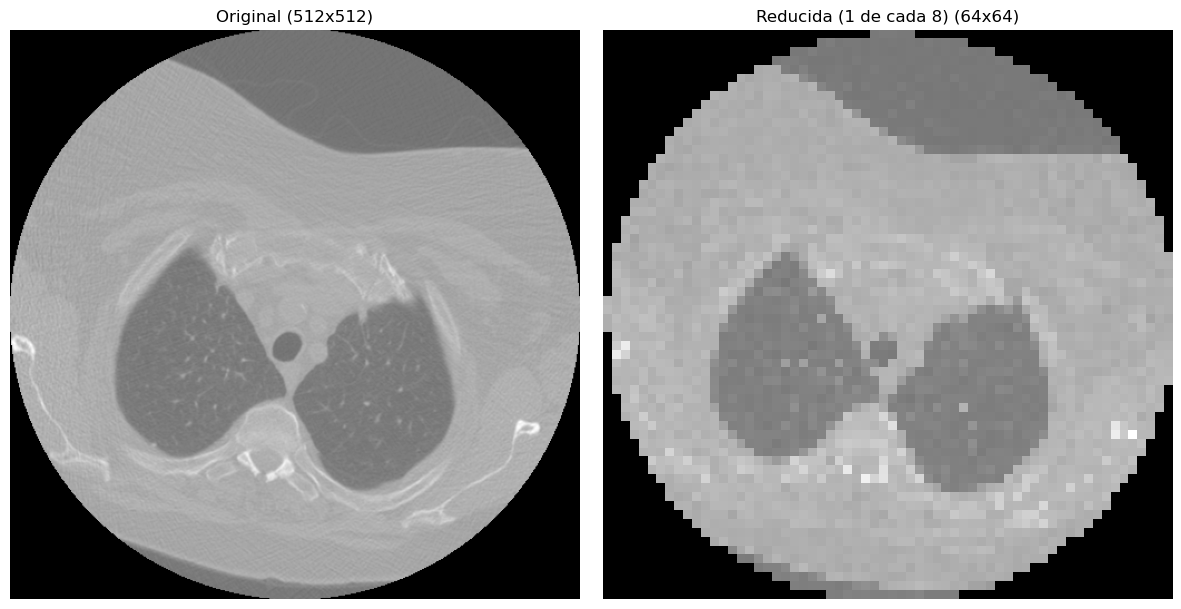


Comentarios sobre las diferencias:
Observa las dos imágenes mostradas arriba y compara:
- Claridad y detalle: ¿Cómo afecta la reducción de píxeles a la visibilidad de las estructuras finas?
- Tamaño: La reducción de tamaño es evidente.
- Posibles artefactos: ¿Aparecen patrones extraños o bordes 'escalonados' (aliasing) en la imagen reducida?
- Información perdida: ¿Qué información crees que se pierde irreversiblemente con este tipo de downsampling?

(Escribe tus comentarios detallados en tu informe .ipynb)


In [11]:

# factor de downsampling 
downsample_factor = 8


# Verificar si el archivo existe
if os.path.isfile(p5_filepath):
        # Leer el archivo DICOM
        ds = pydicom.dcmread(p5_filepath)

        # Verificar que tenga datos de imagen
        if 'PixelData' in ds:
            original_image = ds.pixel_array
            original_shape = original_image.shape

            # --- Realizar el Downsampling ---
            # Usar slicing de NumPy: array[start:stop:step]
            # ::n significa tomar elementos desde el principio hasta el final, con un paso de 'n'
            downsampled_image = original_image[::downsample_factor, ::downsample_factor]
            downsampled_shape = downsampled_image.shape

            # --- Visualización ---
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            # Mostrar imagen original
            axes[0].imshow(original_image, cmap=plt.cm.gray)
            axes[0].set_title(f'Original ({original_shape[0]}x{original_shape[1]})')
            axes[0].axis('off')

            # Mostrar imagen reducida
            axes[1].imshow(downsampled_image, cmap=plt.cm.gray)
            axes[1].set_title(f'Reducida (1 de cada {downsample_factor}) ({downsampled_shape[0]}x{downsampled_shape[1]})')
            axes[1].axis('off')

            plt.tight_layout()
            plt.show()

            # --- Comentarios ---
            print("\n" + "="*30)
            print("Comentarios sobre las diferencias:")
            print("="*30)
            print("Observa las dos imágenes mostradas arriba y compara:")
            print("- Claridad y detalle: ¿Cómo afecta la reducción de píxeles a la visibilidad de las estructuras finas?")
            print("- Tamaño: La reducción de tamaño es evidente.")
            print("- Posibles artefactos: ¿Aparecen patrones extraños o bordes 'escalonados' (aliasing) en la imagen reducida?")
            print("- Información perdida: ¿Qué información crees que se pierde irreversiblemente con este tipo de downsampling?")
            print("\n(Escribe tus comentarios detallados en tu informe .ipynb)")


## 3.7

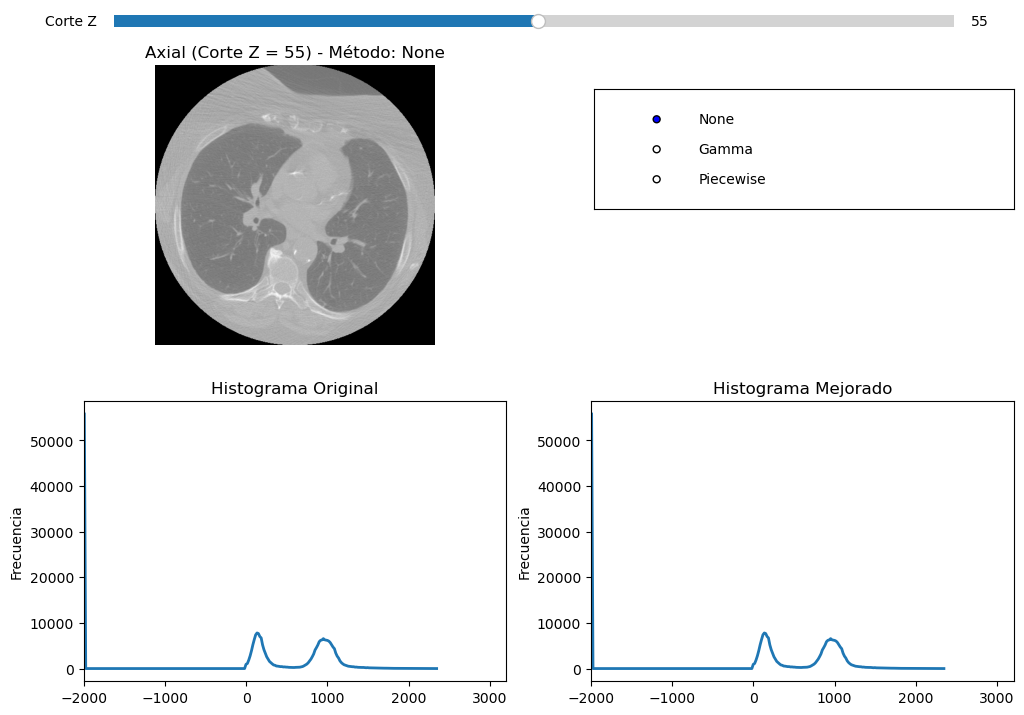


Comentarios sobre la Mejora de Contraste:
Experimenta con los controles (Gamma, Piecewise Linear) y observa:
- ¿Cómo afecta el parámetro gamma al brillo y contraste general?
- ¿Para qué tipo de imágenes (oscuras, brillantes, bajo contraste) es útil cada método?
- ¿Cómo se relaciona la forma de la función de transformación (implícita en Piecewise, explícita en Gamma) con la forma del histograma resultante?
- ¿Cuándo la 'mejora' de contraste podría hacer que se pierdan detalles o se introduzcan artefactos?

(Escribe tus comentarios detallados en tu informe .ipynb)


In [12]:

from matplotlib.widgets import Slider, RadioButtons 

data_dir_2 

def normalize_image(img):
    """Normaliza la imagen al rango [0, 1] para procesamiento."""
    min_val = np.min(img)
    max_val = np.max(img)
    if max_val > min_val:
        return (img.astype(np.float32) - min_val) / (max_val - min_val)
    else:
        # Evitar división por cero si la imagen es constante
        return np.zeros_like(img, dtype=np.float32)

def denormalize_image(img_norm, original_min, original_max):
    """Devuelve la imagen normalizada a su rango original."""
    if original_max > original_min:
        return (img_norm * (original_max - original_min)) + original_min
    else:
        # Si el rango original era cero, devolver una imagen constante
        return np.full_like(img_norm, original_min)

def gamma_correction(img, gamma, c=1.0):
    """Aplica la corrección gamma: s = c * r^gamma."""
    # Guardar rango original
    min_val, max_val = np.min(img), np.max(img)
    # Normalizar
    img_norm = normalize_image(img)
    # Aplicar gamma (asegurándose de que gamma no sea cero o negativo)
    gamma_safe = max(gamma, 0.01) # Evitar gamma <= 0
    img_corrected_norm = c * (img_norm ** gamma_safe)
    # Recortar a [0, 1] en caso de que c > 1
    img_corrected_norm = np.clip(img_corrected_norm, 0, 1)
    # Devolver al rango original
    return denormalize_image(img_corrected_norm, min_val, max_val)

def piecewise_linear(img, r1, s1, r2, s2):
    """Aplica transformación lineal por tramos (3 segmentos)."""
    # Guardar rango original y normalizar los puntos de control r1, r2
    min_val, max_val = np.min(img), np.max(img)
    if max_val <= min_val: # Imagen constante, no hacer nada
        return img.copy()

    r1_norm = (r1 - min_val) / (max_val - min_val)
    r2_norm = (r2 - min_val) / (max_val - min_val)
    s1_norm = s1 # Asumimos que s1, s2 ya están en [0, 1]
    s2_norm = s2 # Asumimos que s1, s2 ya están en [0, 1]

    # Asegurarse de que r1 < r2 y s1, s2 estén en [0, 1]
    r1_norm = np.clip(r1_norm, 0, 1)
    r2_norm = np.clip(r2_norm, 0, 1)
    s1_norm = np.clip(s1_norm, 0, 1)
    s2_norm = np.clip(s2_norm, 0, 1)
    if r1_norm >= r2_norm: # Evitar puntos inválidos
        r1_norm = 0.4
        r2_norm = 0.6

    img_norm = normalize_image(img)
    img_transformed_norm = np.zeros_like(img_norm)

    # Tramo 1: [0, r1] -> [0, s1]
    mask1 = img_norm < r1_norm
    if r1_norm > 0: # Evitar división por cero
      slope1 = s1_norm / r1_norm
      img_transformed_norm[mask1] = slope1 * img_norm[mask1]
    else: # Si r1 es 0, todos estos píxeles van a s1 (o 0 si s1 es 0)
      img_transformed_norm[mask1] = s1_norm if s1_norm > 0 else 0

    # Tramo 2: [r1, r2] -> [s1, s2]
    mask2 = (img_norm >= r1_norm) & (img_norm <= r2_norm)
    if r2_norm > r1_norm: # Evitar división por cero
        slope2 = (s2_norm - s1_norm) / (r2_norm - r1_norm)
        img_transformed_norm[mask2] = s1_norm + slope2 * (img_norm[mask2] - r1_norm)
    else: # Si r1=r2, los píxeles en r1 van a s1 (o (s1+s2)/2 ?)
        img_transformed_norm[mask2] = s1_norm

    # Tramo 3: [r2, 1] -> [s2, 1]
    mask3 = img_norm > r2_norm
    if 1 > r2_norm: # Evitar división por cero
      slope3 = (1 - s2_norm) / (1 - r2_norm)
      img_transformed_norm[mask3] = s2_norm + slope3 * (img_norm[mask3] - r2_norm)
    else: # Si r2 es 1, todos estos píxeles van a s2 (o 1 si s2 es 1)
       img_transformed_norm[mask3] = 1.0 if s2_norm >= 1.0 else s2_norm

    # Devolver al rango original
    return denormalize_image(img_transformed_norm, min_val, max_val)

# --- Inicio: Código para leer y ordenar los cortes ---
slices_3 = [] # Lista para guardar los datasets leídos

# Verificar si el directorio data_2 existe
if os.path.isdir(data_dir_2):

    # Leer todos los archivos DICOM en el directorio
    for filename in os.listdir(data_dir_2):
        filepath = os.path.join(data_dir_2, filename)
        if os.path.isfile(filepath): # Asegurarse de que es un archivo
            # Leer el archivo DICOM
            ds = pydicom.dcmread(filepath)
            # Verificar que tenga datos de imagen y alguna etiqueta de posición para ordenar
            if 'PixelData' in ds and ('SliceLocation' in ds or 'ImagePositionPatient' in ds):
                slices_3.append(ds) # Añadir el dataset a la lista
            else:
                # Registrar si falta PixelData o etiqueta de posición
                missing_tags = []
                if 'PixelData' not in ds: missing_tags.append('PixelData')
                if 'SliceLocation' not in ds and 'ImagePositionPatient' not in ds:
                    missing_tags.append('SliceLocation/ImagePositionPatient')

# Verificar si se leyeron cortes válidos
if slices_3:
    # Ordenar los cortes --- ¡MUY IMPORTANTE! ---
    # Intentar ordenar por SliceLocation primero, si no, por la componente Z de ImagePositionPatient
    sorted_correctly = False
    first_slice = slices_3[0] # Tomar el primer slice para verificar qué etiqueta usar
    if hasattr(first_slice, 'SliceLocation'):
        # Ordenar usando SliceLocation como número flotante
        slices_3.sort(key=lambda x: float(x.SliceLocation))

        sorted_correctly = True
    elif hasattr(first_slice, 'ImagePositionPatient'):
        # Ordenar usando la tercera componente (Z) de ImagePositionPatient
        slices_3.sort(key=lambda x: float(x.ImagePositionPatient[2]))

        sorted_correctly = True

    # --- Fin: Código para leer y ordenar los cortes ---


# --- Construcción del Volumen 3D (similar a antes) ---
volume_3d = None

if slices_3: # Verificar si se cargaron slices
    shape_check = slices_3[0].pixel_array.shape
    if all(s.pixel_array.shape == shape_check for s in slices_3):
        volume_3d = np.stack([s.pixel_array for s in slices_3], axis=0)


# --- Inicio Visualización Interactiva ---
if volume_3d is not None:
    num_slices, rows, cols = volume_3d.shape
    current_slice_index = num_slices // 2 # Índice inicial

    # Configurar la figura: 2 filas (imagen + controles, histogramas)
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 2) # GridSpec para mejor control

    ax_image = fig.add_subplot(gs[0, 0]) # Eje para la imagen
    ax_hist_orig = fig.add_subplot(gs[1, 0]) # Eje para histograma original
    ax_hist_enhanced = fig.add_subplot(gs[1, 1]) # Eje para histograma mejorado
    ax_controls = fig.add_subplot(gs[0, 1]) # Eje para controles (widgets)

    # Ocultar ejes de controles
    ax_controls.axis('off')

    # Mostrar imagen inicial
    img_display = ax_image.imshow(volume_3d[current_slice_index], cmap=plt.cm.gray)
    ax_image.set_title(f'Axial (Corte Z = {current_slice_index})')
    ax_image.axis('off')

    # Mostrar histogramas iniciales
    hist_orig_line, = ax_hist_orig.plot([], [], lw=2)
    hist_enhanced_line, = ax_hist_enhanced.plot([], [], lw=2)
    ax_hist_orig.set_title('Histograma Original')
    ax_hist_enhanced.set_title('Histograma Mejorado')
    ax_hist_orig.set_xlim(np.min(volume_3d), np.max(volume_3d)) # Ajustar límites X iniciales
    ax_hist_enhanced.set_xlim(np.min(volume_3d), np.max(volume_3d))
    ax_hist_orig.set_ylabel('Frecuencia')
    ax_hist_enhanced.set_ylabel('Frecuencia')


    # --- Crear Widgets ---
    widget_elements = {} # Diccionario para guardar referencias a widgets

    # Slider para corte Z
    ax_slider_z = fig.add_axes([0.15, 0.92, 0.7, 0.03]) # Posición arriba
    widget_elements['slider_z'] = Slider(ax=ax_slider_z, label='Corte Z',
                                         valmin=0, valmax=num_slices - 1,
                                         valinit=current_slice_index, valstep=1)

    # RadioButtons para tipo de mejora
    ax_radio_enhance = fig.add_axes([0.55, 0.7, 0.35, 0.15]) # En área de controles
    widget_elements['radio_enhance'] = RadioButtons(ax=ax_radio_enhance,
                                                    labels=('None', 'Gamma', 'Piecewise'),
                                                    active=0) # 'None' por defecto

    # Sliders para parámetros (inicialmente ocultos o inactivos)
    param_sliders_ax = {}
    param_sliders = {}

    # Gamma slider
    ax_gamma = fig.add_axes([0.6, 0.65, 0.3, 0.03])
    param_sliders_ax['gamma'] = ax_gamma
    param_sliders['gamma'] = Slider(ax=ax_gamma, label=r'$\gamma$', valmin=0.1, valmax=5.0, valinit=1.0)
    ax_gamma.set_visible(False) # Oculto inicialmente

    # Piecewise sliders (r1, s1, r2, s2) - usar valores iniciales razonables
    min_data, max_data = np.min(volume_3d), np.max(volume_3d)
    initial_r1 = min_data + 0.25 * (max_data - min_data)
    initial_s1 = 0.1
    initial_r2 = min_data + 0.75 * (max_data - min_data)
    initial_s2 = 0.9

    ax_r1 = fig.add_axes([0.6, 0.60, 0.3, 0.03])
    param_sliders_ax['r1'] = ax_r1
    param_sliders['r1'] = Slider(ax=ax_r1, label='r1', valmin=min_data, valmax=max_data, valinit=initial_r1)
    ax_r1.set_visible(False)

    ax_s1 = fig.add_axes([0.6, 0.55, 0.3, 0.03])
    param_sliders_ax['s1'] = ax_s1
    param_sliders['s1'] = Slider(ax=ax_s1, label='s1', valmin=0.0, valmax=1.0, valinit=initial_s1)
    ax_s1.set_visible(False)

    ax_r2 = fig.add_axes([0.6, 0.50, 0.3, 0.03])
    param_sliders_ax['r2'] = ax_r2
    param_sliders['r2'] = Slider(ax=ax_r2, label='r2', valmin=min_data, valmax=max_data, valinit=initial_r2)
    ax_r2.set_visible(False)

    ax_s2 = fig.add_axes([0.6, 0.45, 0.3, 0.03])
    param_sliders_ax['s2'] = ax_s2
    param_sliders['s2'] = Slider(ax=ax_s2, label='s2', valmin=0.0, valmax=1.0, valinit=initial_s2)
    ax_s2.set_visible(False)

    # --- Función de Actualización ---
    def update_display(*args):
        # Obtener slice actual
        slice_idx = int(widget_elements['slider_z'].val)
        original_slice = volume_3d[slice_idx]
        min_orig, max_orig = np.min(original_slice), np.max(original_slice)

        # Determinar tipo de mejora y obtener parámetros
        enhance_type = widget_elements['radio_enhance'].value_selected
        enhanced_slice = original_slice.copy() # Empezar con la original

        if enhance_type == 'Gamma':
            gamma_val = param_sliders['gamma'].val
            enhanced_slice = gamma_correction(original_slice, gamma_val)
        elif enhance_type == 'Piecewise':
            r1_val = param_sliders['r1'].val
            s1_val = param_sliders['s1'].val
            r2_val = param_sliders['r2'].val
            s2_val = param_sliders['s2'].val
            # Asegurar r1 < r2
            if r1_val >= r2_val:
               r1_val = r2_val - 1 # Ajuste simple para evitar error
            enhanced_slice = piecewise_linear(original_slice, r1_val, s1_val, r2_val, s2_val)

        # Actualizar imagen
        img_display.set_data(enhanced_slice)
        img_display.set_clim(vmin=np.min(enhanced_slice), vmax=np.max(enhanced_slice)) # Actualizar límites de color
        ax_image.set_title(f'Axial (Corte Z = {slice_idx}) - Método: {enhance_type}')

        # Actualizar histogramas
        bins = 256 # Número de bins para el histograma
        hist_orig, bin_edges_orig = np.histogram(original_slice.ravel(), bins=bins, range=(min_orig, max_orig))
        bin_centers_orig = 0.5 * (bin_edges_orig[:-1] + bin_edges_orig[1:])

        min_enh, max_enh = np.min(enhanced_slice), np.max(enhanced_slice)
        hist_enhanced, bin_edges_enh = np.histogram(enhanced_slice.ravel(), bins=bins, range=(min_enh, max_enh))
        bin_centers_enh = 0.5 * (bin_edges_enh[:-1] + bin_edges_enh[1:])

        hist_orig_line.set_data(bin_centers_orig, hist_orig)
        hist_enhanced_line.set_data(bin_centers_enh, hist_enhanced)

        # Reajustar límites de los ejes de histogramas
        ax_hist_orig.relim()
        ax_hist_orig.autoscale_view()
        ax_hist_enhanced.relim()
        ax_hist_enhanced.autoscale_view()
        # Mantener el límite X del histograma original fijo si se prefiere
        # ax_hist_orig.set_xlim(min_data, max_data)
        # ax_hist_enhanced.set_xlim(np.min(enhanced_slice), np.max(enhanced_slice))


        # Redibujar
        fig.canvas.draw_idle()

    # --- Función para manejar visibilidad de controles ---
    def update_control_visibility(label):
        is_gamma = (label == 'Gamma')
        is_piecewise = (label == 'Piecewise')

        param_sliders_ax['gamma'].set_visible(is_gamma)
        param_sliders_ax['r1'].set_visible(is_piecewise)
        param_sliders_ax['s1'].set_visible(is_piecewise)
        param_sliders_ax['r2'].set_visible(is_piecewise)
        param_sliders_ax['s2'].set_visible(is_piecewise)

        # Forzar actualización de la pantalla
        update_display()


    # --- Conectar Widgets ---
    widget_elements['slider_z'].on_changed(update_display)
    widget_elements['radio_enhance'].on_clicked(update_control_visibility) # Llama a visibilidad y luego a update
    param_sliders['gamma'].on_changed(update_display)
    param_sliders['r1'].on_changed(update_display)
    param_sliders['s1'].on_changed(update_display)
    param_sliders['r2'].on_changed(update_display)
    param_sliders['s2'].on_changed(update_display)

    # Llamada inicial para configurar visibilidad y mostrar primer estado
    update_control_visibility(widget_elements['radio_enhance'].value_selected)

    plt.show()

    # --- Comentarios ---
    print("\n" + "="*30)
    print("Comentarios sobre la Mejora de Contraste:")
    print("="*30)
    print("Experimenta con los controles (Gamma, Piecewise Linear) y observa:")
    print("- ¿Cómo afecta el parámetro gamma al brillo y contraste general?")
    print("- ¿Para qué tipo de imágenes (oscuras, brillantes, bajo contraste) es útil cada método?")
    print("- ¿Cómo se relaciona la forma de la función de transformación (implícita en Piecewise, explícita en Gamma) con la forma del histograma resultante?")
    print("- ¿Cuándo la 'mejora' de contraste podría hacer que se pierdan detalles o se introduzcan artefactos?")
    print("\n(Escribe tus comentarios detallados en tu informe .ipynb)")


## 3.8

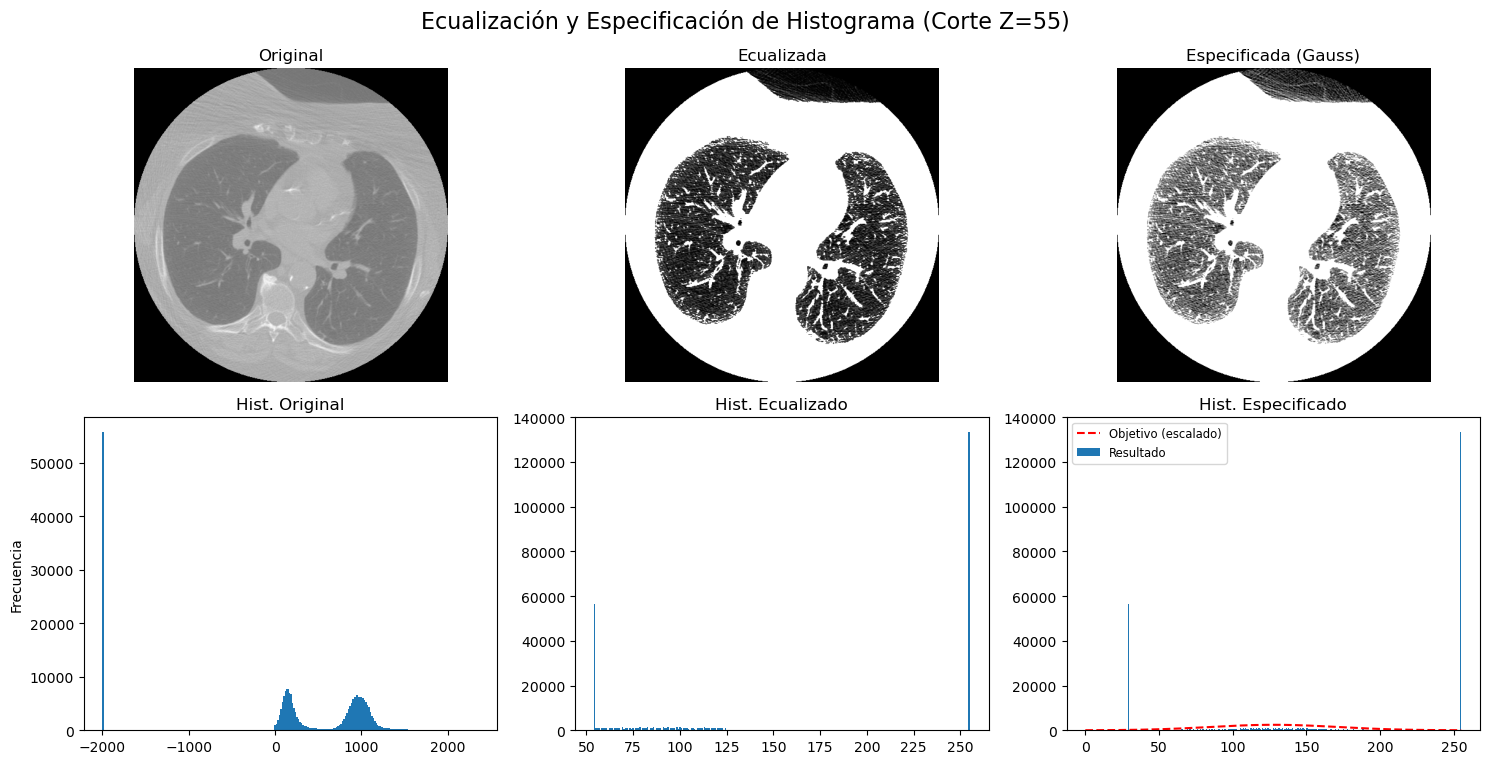


Análisis de Resultados (Histogramas):
Observa las imágenes y sus histogramas:
- Ecualización: Compara el histograma original con el ecualizado. ¿Tiende a ser más plano? ¿Cómo afecta esto al contraste visual de la imagen?
- Especificación: Compara el histograma resultante con el histograma objetivo (Gaussiano en este caso). ¿Se parecen? ¿Cómo se ve la imagen resultante comparada con la original y la ecualizada?
- Aplicabilidad: ¿En qué tipo de imágenes crees que la ecualización sería más útil? ¿Y la especificación?

(Escribe tus explicaciones detalladas en tu informe .ipynb)


In [15]:
# --- Funciones de Histograma ---

def histogram_equalization(image, num_bins=256):
    """Realiza la ecualización del histograma en una imagen 2D."""
    # Calcular histograma
    # Nota: Si la imagen no es de tipo entero (ej. float), necesita discretizarse o
    # el histograma puede tener muchos bins vacíos. Convertimos a entero si es necesario.
    if np.issubdtype(image.dtype, np.floating):
         # Escalar a [0, num_bins-1] y convertir a entero
         img_min, img_max = np.min(image), np.max(image)
         if img_max > img_min:
             image_int = ((image - img_min) / (img_max - img_min) * (num_bins - 1)).astype(int)
         else:
             image_int = np.zeros_like(image, dtype=int)
    else:
         image_int = image.astype(int) # Asegurar tipo entero

    # Clip pixel values to ensure they fall within the valid range [0, num_bins-1]
    image_int = np.clip(image_int, 0, num_bins - 1)
    hist, bin_edges = np.histogram(image_int.flatten(), bins=num_bins, range=(0, num_bins-1))

    # Calcular CDF (Función de Distribución Acumulativa)
    cdf = hist.cumsum()

    # Normalizar CDF al rango [0, num_bins-1]
    # cdf_m = np.ma.masked_equal(cdf, 0) # Enmascarar ceros para la normalización
    # cdf_m = (cdf_m - cdf_m.min()) * (num_bins - 1) / (cdf_m.max() - cdf_m.min())
    # cdf_final = np.ma.filled(cdf_m, 0).astype('uint8') # Rellenar máscara

    # Normalización más simple y común:
    # Escalar por el número total de píxeles para obtener probabilidad [0,1]
    # y luego escalar a [0, num_bins-1]
    cdf_normalized = cdf * (num_bins - 1) / cdf[-1] # cdf[-1] es el número total de píxeles

    # Mapear las intensidades originales usando la CDF normalizada como tabla de búsqueda (LUT)
    equalized_image_int = np.interp(image_int.flatten(), np.arange(num_bins), cdf_normalized)
    equalized_image = equalized_image_int.reshape(image.shape)

    # Si la imagen original era float, devolverla a su rango aproximado (opcional)
    # if np.issubdtype(image.dtype, np.floating):
    #     equalized_image = img_min + (equalized_image / (num_bins - 1)) * (img_max - img_min)

    return equalized_image.astype(image.dtype) # Devolver con el mismo tipo que la entrada

def histogram_specification(image, target_hist, num_bins=256):
    """Realiza la especificación del histograma."""
    # Asegurar que la imagen y el target_hist tengan el mismo número de bins implícito
    if np.issubdtype(image.dtype, np.floating):
         img_min, img_max = np.min(image), np.max(image)
         if img_max > img_min:
             image_int = ((image - img_min) / (img_max - img_min) * (num_bins - 1)).astype(int)
         else:
             image_int = np.zeros_like(image, dtype=int)
    else:
         image_int = image.astype(int)

    # 1. Calcular CDF de la imagen de entrada
    hist_in, _ = np.histogram(image_int.flatten(), bins=num_bins, range=(0, num_bins-1))
    cdf_in = hist_in.cumsum()
    cdf_in_normalized = cdf_in / cdf_in[-1] # Normalizar a [0, 1]

    # 2. Calcular CDF del histograma objetivo
    # Asegurarse de que target_hist tenga la longitud correcta (num_bins)
    if len(target_hist) != num_bins:
        # Interpolar o ajustar target_hist si es necesario (simplificación: error)
        raise ValueError(f"Target histogram debe tener {num_bins} elementos.")
    cdf_target = target_hist.cumsum()
    cdf_target_normalized = cdf_target / cdf_target[-1] # Normalizar a [0, 1]

    # 3. Crear la tabla de mapeo (LUT)
    # Para cada nivel de gris 'g' de la entrada, encontrar el nivel 'z' del objetivo
    # tal que CDF_target(z) >= CDF_in(g)
    lookup_table = np.zeros(num_bins)
    for g in range(num_bins):
        # Encontrar el índice j más pequeño tal que cdf_target[j] >= cdf_in[g]
        j = np.searchsorted(cdf_target_normalized, cdf_in_normalized[g], side='left')
        # Limitar j al rango [0, num_bins-1]
        j = min(j, num_bins - 1)
        lookup_table[g] = j
    # Clip pixel values to ensure they fall within the valid range [0, num_bins-1]
    image_int = np.clip(image_int, 0, num_bins - 1)
    specified_image_int = lookup_table[image_int.flatten()]
    # 4. Aplicar el mapeo a la imagen de entrada
    specified_image_int = lookup_table[image_int.flatten()]
    specified_image = specified_image_int.reshape(image.shape)

    # Devolver al rango original si era float (opcional)
    # ...

    return specified_image.astype(image.dtype)

# --- Construcción del Volumen 3D (similar a antes) ---
volume_3d = None

if slices_3: # Verificar si se cargaron slices
    shape_check = slices_3[0].pixel_array.shape
    if all(s.pixel_array.shape == shape_check for s in slices_3):
        volume_3d = np.stack([s.pixel_array for s in slices_3], axis=0)

# --- Código Principal ---

# Verificar si volume_3d existe (debe haber sido cargado antes)
if volume_3d is not None:
    # Seleccionar un corte de ejemplo (ej. el central)
    slice_index = volume_3d.shape[0] // 2
    original_slice = volume_3d[slice_index]

    # Aplicar Ecualización
    equalized_slice = histogram_equalization(original_slice)


    # Aplicar Especificación
    # Crear un histograma objetivo de ejemplo (ej. Gaussiano centrado)
    num_bins_spec = 256
    bins = np.arange(num_bins_spec)
    mean = num_bins_spec / 2
    std_dev = num_bins_spec / 6
    target_hist_gaussian = np.exp(-((bins - mean)**2 / (2 * std_dev**2)))
    # Normalizar para que sume como un histograma (aunque la CDF es lo importante)
    target_hist_gaussian /= target_hist_gaussian.sum()
    # Multiplicar por un número grande para simular cuentas
    target_hist_gaussian *= original_slice.size

    specified_slice = histogram_specification(original_slice, target_hist_gaussian, num_bins=num_bins_spec)



    # --- Visualización ---
    fig, axes = plt.subplots(2, 3, figsize=(15, 8)) # 2 filas (imagen, histograma), 3 columnas

    # Imagen Original
    ax = axes[0, 0]
    im = ax.imshow(original_slice, cmap=plt.cm.gray)
    ax.set_title('Original')
    ax.axis('off')
    # fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) # Opcional: barra de color

    # Histograma Original
    ax = axes[1, 0]
    hist_orig, bins_orig = np.histogram(original_slice.ravel(), bins=256)
    center_orig = (bins_orig[:-1] + bins_orig[1:]) / 2
    ax.bar(center_orig, hist_orig, width=(bins_orig[1]-bins_orig[0]))
    ax.set_title('Hist. Original')
    ax.set_ylabel('Frecuencia')


    # Imagen Ecualizada
    ax = axes[0, 1]
    im = ax.imshow(equalized_slice, cmap=plt.cm.gray)
    ax.set_title('Ecualizada')
    ax.axis('off')
    # fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # Histograma Ecualizado
    ax = axes[1, 1]
    hist_eq, bins_eq = np.histogram(equalized_slice.ravel(), bins=256)
    center_eq = (bins_eq[:-1] + bins_eq[1:]) / 2
    ax.bar(center_eq, hist_eq, width=(bins_eq[1]-bins_eq[0]))
    ax.set_title('Hist. Ecualizado')


    # Imagen Especificada
    ax = axes[0, 2]
    im = ax.imshow(specified_slice, cmap=plt.cm.gray)
    ax.set_title('Especificada (Gauss)')
    ax.axis('off')
    # fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # Histograma Especificado
    ax = axes[1, 2]
    hist_spec, bins_spec = np.histogram(specified_slice.ravel(), bins=256)
    center_spec = (bins_spec[:-1] + bins_spec[1:]) / 2
    ax.bar(center_spec, hist_spec, width=(bins_spec[1]-bins_spec[0]), label='Resultado')
    # Superponer el objetivo (escalado) para comparar
    ax.plot(np.arange(num_bins_spec), target_hist_gaussian * (hist_spec.sum() / target_hist_gaussian.sum()),
            color='red', linestyle='--', label='Objetivo (escalado)')
    ax.set_title('Hist. Especificado')
    ax.legend(fontsize='small')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout, dejar espacio para título general
    fig.suptitle(f'Ecualización y Especificación de Histograma (Corte Z={slice_index})', fontsize=16)
    plt.show()

    # --- Comentarios ---
    print("\n" + "="*30)
    print("Análisis de Resultados (Histogramas):")
    print("="*30)
    print("Observa las imágenes y sus histogramas:")
    print("- Ecualización: Compara el histograma original con el ecualizado. ¿Tiende a ser más plano? ¿Cómo afecta esto al contraste visual de la imagen?")
    print("- Especificación: Compara el histograma resultante con el histograma objetivo (Gaussiano en este caso). ¿Se parecen? ¿Cómo se ve la imagen resultante comparada con la original y la ecualizada?")
    print("- Aplicabilidad: ¿En qué tipo de imágenes crees que la ecualización sería más útil? ¿Y la especificación?")
    print("\n(Escribe tus explicaciones detalladas en tu informe .ipynb)")